<a href="https://colab.research.google.com/github/bhargav-borah/House-Price-Prediction-Model/blob/main/support_vector_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Regression

## Importing the libraries

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the cleaned data set

In [117]:
dataset = pd.read_csv('housing_clean_formatted.csv')

In [118]:
dataset = dataset.drop(columns=['Unnamed: 0'])

## Extracting the Features and the Dependent Variable from the DataFrame

In [119]:
dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN,median_house_value
0,-122.23,37.88,41,880,129,322,126,8.3252,0,0,1,0,452600
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,0,0,1,0,358500
2,-122.24,37.85,52,1467,190,496,177,7.2574,0,0,1,0,352100
3,-122.25,37.85,52,1274,235,558,219,5.6431,0,0,1,0,341300
4,-122.25,37.85,52,1627,280,565,259,3.8462,0,0,1,0,342200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374,845,330,1.5603,0,1,0,0,78100
20636,-121.21,39.49,18,697,150,356,114,2.5568,0,1,0,0,77100
20637,-121.22,39.43,17,2254,485,1007,433,1.7000,0,1,0,0,92300
20638,-121.32,39.43,18,1860,409,741,349,1.8672,0,1,0,0,84700


In [124]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
y = y.reshape(-1, 1)
y.shape

(20640, 1)

## Feature Scaling

In [125]:
from sklearn.preprocessing import StandardScaler
sc_X, sc_y = StandardScaler(), StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

## Splitting the data set into the Training set and the Test set

In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## Training the Model

In [127]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Pedicting the Results

### Training set

In [128]:
y_pred_train = regressor.predict(X_train)
actual_values = sc_y.inverse_transform(y_train.reshape(-1, 1))
predictions = sc_y.inverse_transform(y_pred_train.reshape(-1, 1))

In [129]:
y_train

array([[-0.27606412],
       [-0.72496553],
       [-0.76569596],
       ...,
       [ 1.69632896],
       [-1.23712911],
       [-0.20240269]])

In [130]:
sc_y.inverse_transform(y_train)

array([[175000.],
       [123200.],
       [118500.],
       ...,
       [402600.],
       [ 64100.],
       [183500.]])

In [131]:
performance_train = pd.DataFrame({'ACTUAL VALUES': actual_values.flatten(), 'PREDICTIONS': predictions.flatten()})
performance_train

,ACTUAL VALUES,PREDICTIONS
0,175000.0,199713.939050
1,123200.0,175016.411462
2,118500.0,124684.403079
3,153900.0,156960.781075
4,318900.0,299617.442654
...,...,...
15475,182800.0,196380.991790
15476,175500.0,143169.761616
15477,402600.0,310012.533967
15478,64100.0,57748.394044


### Test set

In [132]:
y_pred_test = regressor.predict(X_test)
actual_values = sc_y.inverse_transform(y_test.reshape(-1, 1))
predictions = sc_y.inverse_transform(y_pred_test.reshape(-1, 1))
performance_test = pd.DataFrame({'ACTUAL VALUES': actual_values.flatten(), 'PREDICTIONS': predictions.flatten()})
performance_test

,ACTUAL VALUES,PREDICTIONS
0,306700.0,259251.220534
1,268200.0,198373.465531
2,169400.0,150399.914805
3,144800.0,179952.188148
4,187500.0,147618.301447
...,...,...
5155,379300.0,340134.128024
5156,173900.0,196775.248585
5157,250000.0,190778.441270
5158,226000.0,310573.564339


## Model Evaluation

In [133]:
from sklearn.metrics import r2_score

### Training set

In [134]:
r_squared_train = r2_score(y_train, y_pred_train)
print('R-squared = ', r_squared_train)

R-squared =  0.7706650818276558


In [135]:
print('Adjusted R-squared = ', 1 - (1-r_squared_train)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

Adjusted R-squared =  0.7701303977363272


### Test set

In [136]:
r_squared_test = r2_score(y_test, y_pred_test)
print('R-squared = ', r2_score(y_test, y_pred_test))

R-squared =  0.7513652557793903


In [137]:
print('Adjusted R-squared = ', 1 - (1-r_squared_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

Adjusted R-squared =  0.7507855750079414


## Visualising the Predictions

### Training set

In [138]:
performance_train['ERROR'] = performance_train['ACTUAL VALUES'] - performance_train['PREDICTIONS']
performance_train.reset_index(drop=True, inplace=True)
performance_train.reset_index(inplace=True)
performance_train

,index,ACTUAL VALUES,PREDICTIONS,ERROR
0,0,175000.0,199713.939050,-24713.939050
1,1,123200.0,175016.411462,-51816.411462
2,2,118500.0,124684.403079,-6184.403079
3,3,153900.0,156960.781075,-3060.781075
4,4,318900.0,299617.442654,19282.557346
...,...,...,...,...
15475,15475,182800.0,196380.991790,-13580.991790
15476,15476,175500.0,143169.761616,32330.238384
15477,15477,402600.0,310012.533967,92587.466033
15478,15478,64100.0,57748.394044,6351.605956


<BarContainer object of 15480 artists>

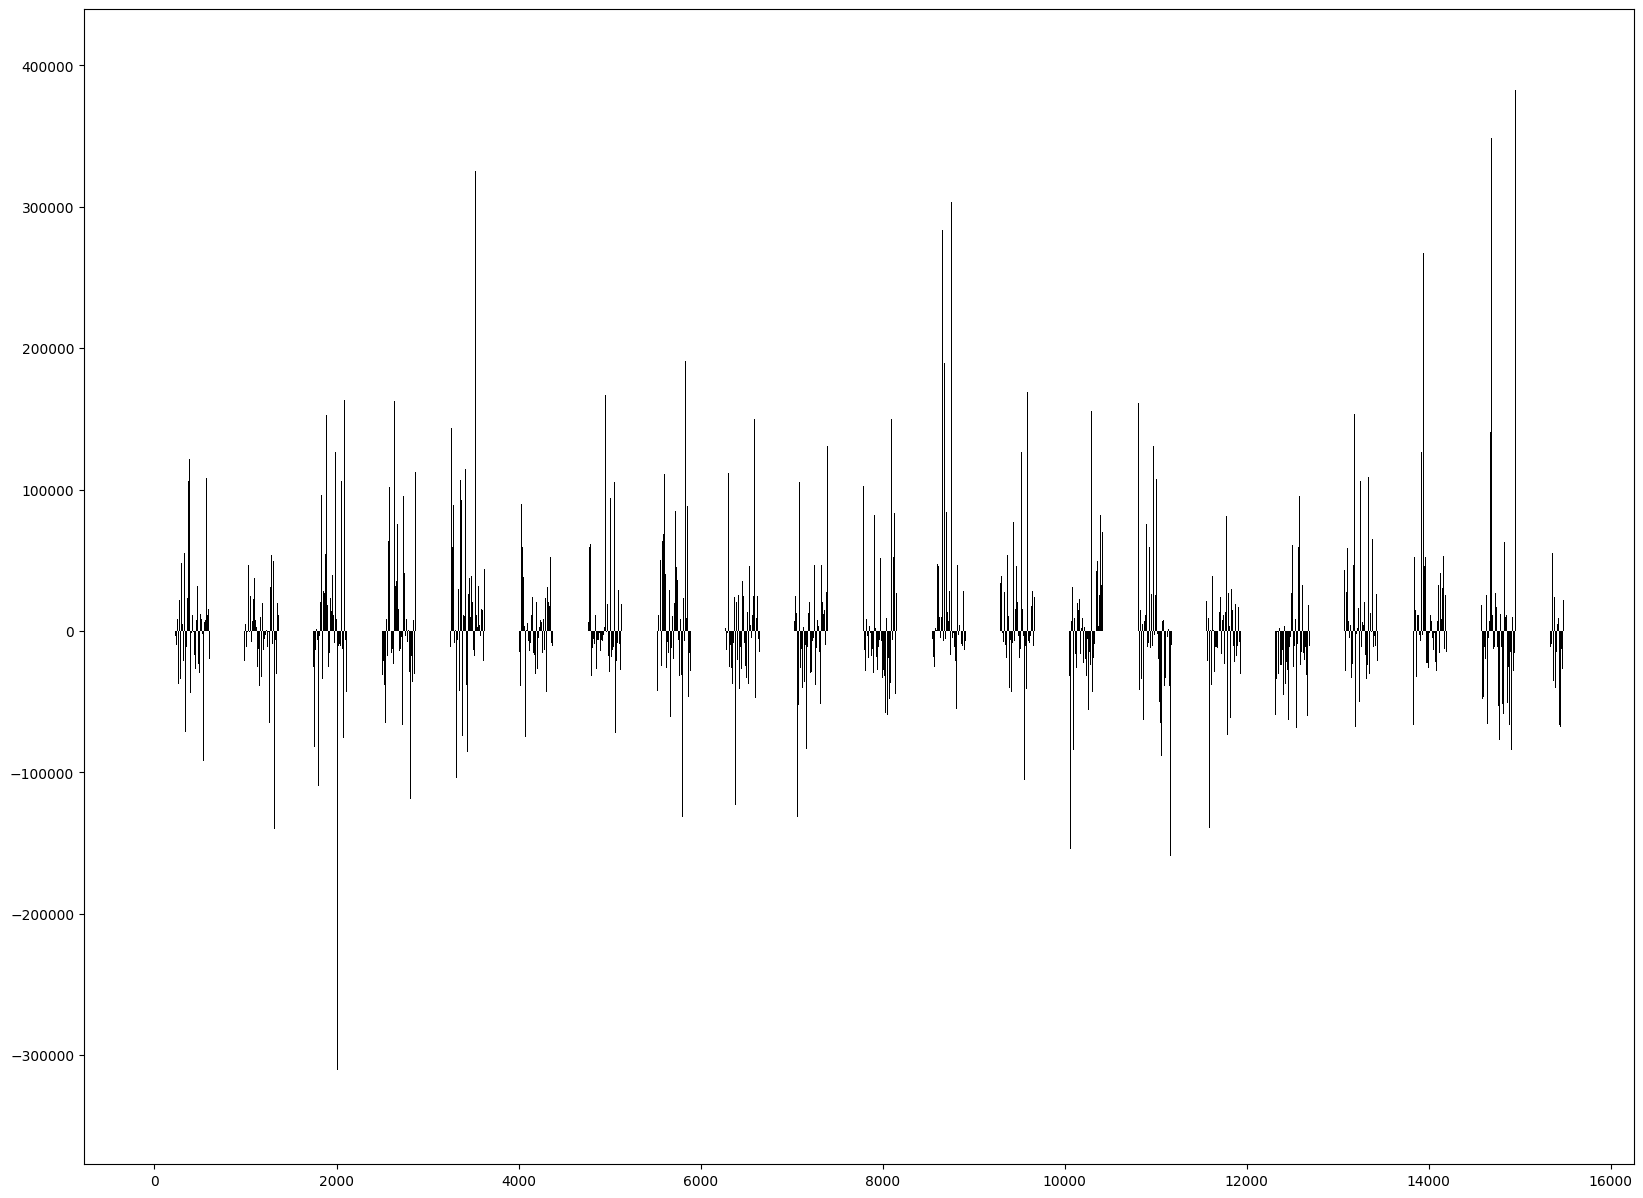

In [139]:
fig = plt.figure(figsize=(20, 15))
plt.bar('index', 'ERROR', data=performance_train, color='black', width=0.5)

In [147]:
y_train.shape
y_pred_train.shape

(15480,)

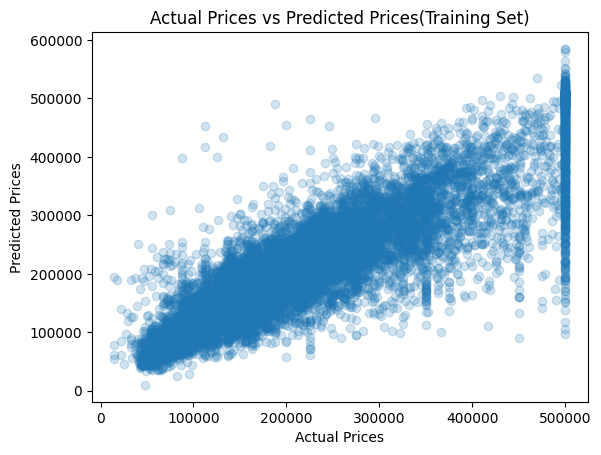

In [148]:
plt.scatter(sc_y.inverse_transform(y_train), sc_y.inverse_transform(y_pred_train.reshape(-1, 1)), alpha=0.2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices(Training Set)')
plt.show()

### Test set

In [141]:
performance_test['ERROR'] = performance_test['ACTUAL VALUES'] - performance_test['PREDICTIONS']
performance_test.reset_index(drop=True, inplace=True)
performance_test.reset_index(inplace=True)
performance_test

,index,ACTUAL VALUES,PREDICTIONS,ERROR
0,0,306700.0,259251.220534,47448.779466
1,1,268200.0,198373.465531,69826.534469
2,2,169400.0,150399.914805,19000.085195
3,3,144800.0,179952.188148,-35152.188148
4,4,187500.0,147618.301447,39881.698553
...,...,...,...,...
5155,5155,379300.0,340134.128024,39165.871976
5156,5156,173900.0,196775.248585,-22875.248585
5157,5157,250000.0,190778.441270,59221.558730
5158,5158,226000.0,310573.564339,-84573.564339


<BarContainer object of 5160 artists>

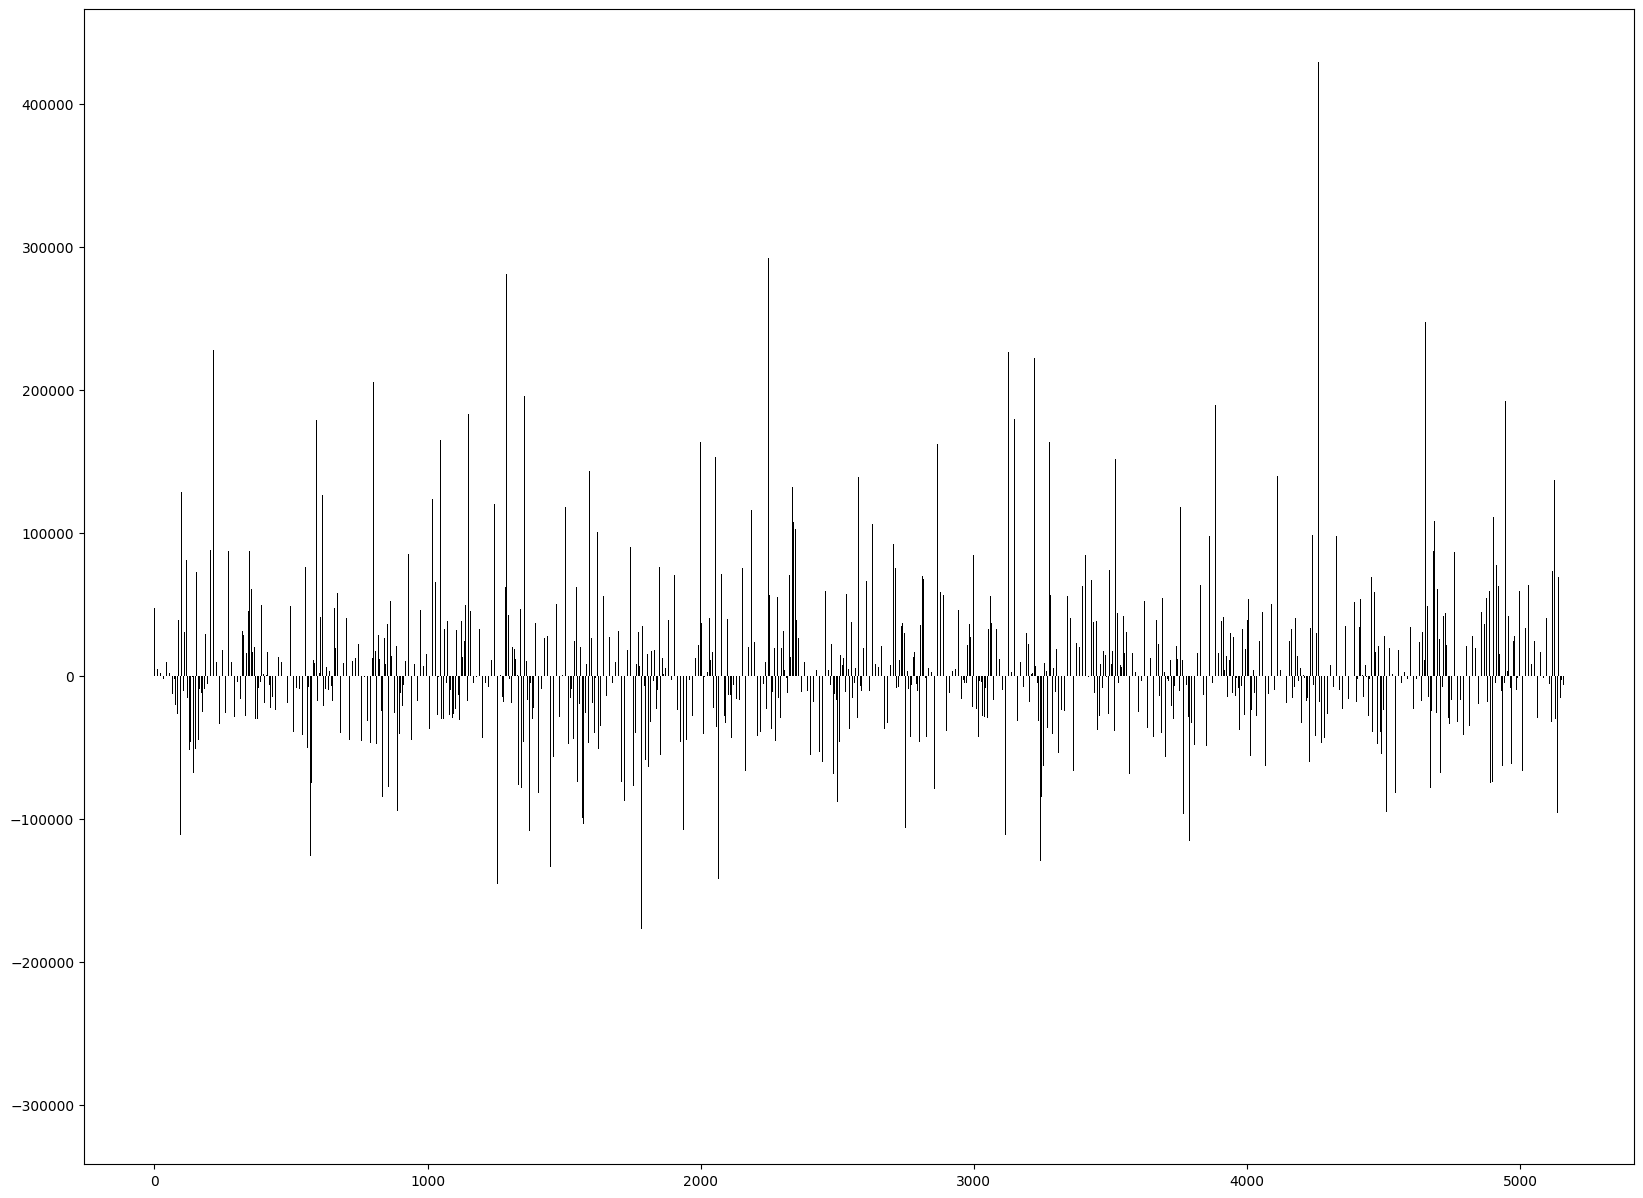

In [142]:
fig = plt.figure(figsize=(20, 15))
plt.bar('index', 'ERROR', data=performance_test, color='black', width=0.5)

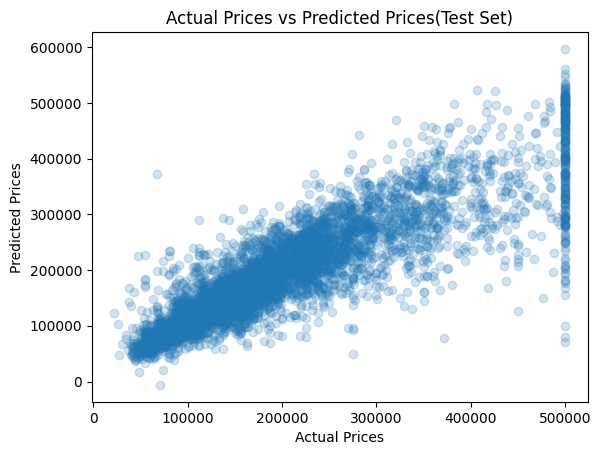

In [153]:
plt.scatter(sc_y.inverse_transform(y_test), sc_y.inverse_transform(y_pred_test.reshape(-1, 1)), alpha=0.2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices(Test Set)')
plt.show()